In [1]:
import sys  
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib_inline
import matplotlib as mpl

sys.path.insert(0, '../../')
from statlearn.regression import LinearResgression

%matplotlib inline
%load_ext autoreload
%autoreload 2
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
rcParams = {
    'font.family' : 'Latin Modern Math',
    'font.size': 12,
    'axes.linewidth' : 1.5,
    'mathtext.fontset' : 'stix'
}
mpl.rcParams.update(rcParams)

# Linear Regression


Linear regression model:

$$ f(\mathbf{X}) = \mathbf{X} \beta + \epsilon, \quad \epsilon \sim N(0, \sigma^2)$$

Unbiased estimator of $\beta$, obtained by minimising $\text{RSS}(\beta) = ||\mathbf{y} = \mathbf{X}\beta||^2$:

$$\hat{\beta} = (\mathbf{X}^T\mathbf{X})^{-1}X^T\mathbf{y}$$

Predicted values:

$$\hat{\mathbf{y}} = \mathbf{X} \hat{\beta} = \mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}X^T\mathbf{y} = \mathbf{H}\mathbf{y}$$
Where, $\mathbf{H} =  \mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}X^T$, is the "hat" matrix. $\hat{\beta}$ is chosen so that the residual vector $\mathbf{y} - \mathbf{\hat{y}}$ is orthogonal to the subspace spanned by the columns of $\mathbf{X}$ (i.e. the predictors).

## Simple Linear Regression

In case when we have a single predictor $\mathbf{x}$, the above simplifies to:

$$\hat{\beta} = \frac{\mathbf{x}^T\mathbf{y}}{\mathbf{x}^T\mathbf{x}}$$

If we add an intercept $\mathbf{1}$, then the coefficient for $\mathbf{x}$ has the form:

$$\hat{\beta}_1 = \frac{\mathbf{(\mathbf{x} - \bar{x} \mathbf{1})}^T\mathbf{y}}{(\mathbf{x} - \bar{x} \mathbf{1})^T(\mathbf{x} - \bar{x} \mathbf{1})}$$

The steps, are:
1. regress $\mathbf{x}$ on $\mathbf{1}$ to produce the residual $\mathbf{z} = \mathbf{x} − \bar{x}\mathbf{1}$;
2. regress $\mathbf{y}$ on the residual $\mathbf{z}$ to give the coefficient $\beta_1$.

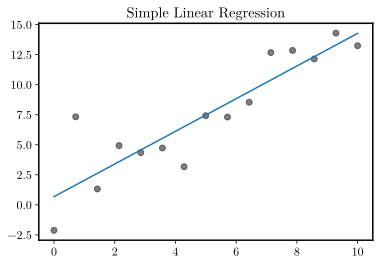

In [2]:
N = 15
X = np.linspace(0, 10, N)
y = X * 1.5 + norm.rvs(0, 2, N)

lm = LinearResgression()
y_pred = lm.fit_trasform(X, y, add_intercept=True)

fig, ax = plt.subplots()
ax.scatter(X, y, color='k', marker='o', alpha=0.5)
ax.plot(X, y_pred)
ax.set_title("Simple Linear Regression")
plt.show()

## Multiple Linear Regression

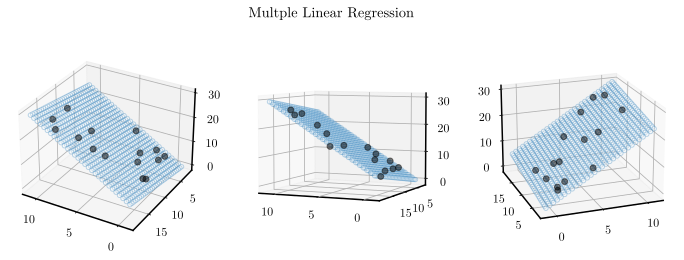

In [3]:
N = 15
X1 = np.linspace(0, 10, N) + norm.rvs(0, 2, N)
X2 = np.linspace(5, 15, N) + norm.rvs(0, 2, N)
X = np.column_stack([X1, X2])
y = 2 * X1 + 0.5 * X2 + norm.rvs(0, 2, N)

lm = LinearResgression()
y_pred = lm.fit_trasform(X, y, add_intercept=True)

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    xx1, xx2 = np.meshgrid(
        np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 30), 
        np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 30)
    )
    model_viz = np.array([xx1.flatten(), xx2.flatten()]).T
    predicted = lm.predict(model_viz, add_intercept=True)
    ax.plot(
        X1, X2, y, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5
    )
    ax.scatter(
        xx1.flatten(), xx2.flatten(), predicted, facecolor=(1, 1, 1, 1), 
        s=20, edgecolor='C0', alpha=0.3
    )
ax1.view_init(elev=30, azim=120)
ax2.view_init(elev=5, azim=114)
ax3.view_init(elev=20, azim=250)
fig.suptitle("Multple Linear Regression")
plt.show()

## Regression by Successive Orthogonalization.

The step, by step procedure, generalises to more than just one predictor.

1. Initialize $\mathbf{z}_0 = \mathbf{x}_0 = \mathbf{1}$.
2. For $j = 1,2,...,p$:

    Regress $\mathbf{x}_j$ on $\mathbf{z}_0, \mathbf{z}_1, \ldots , \mathbf{z}_{j−1}$ to produce coefficients $$\gamma_{lj} =
    \frac{\mathbf{z}_{l}^T \mathbf{x}_j}{\mathbf{z}_{l}^T\mathbf{z}_{l}}, \quad l = 0, \ldots, j − 1$$ and residual vector $$\mathbf{z}_j = \mathbf{x}_j - \sum_{l=0}^{j - 1}\gamma_{lj}\mathbf{z}_l$$
3. Regress $\mathbf{y}$ on the residual $\mathbf{z}_p$ to give the estimate $\beta_p$.


The steps of this algorithm is the *Gram-Schmidt* procedure. It can be represented in a matrix form:

$$\mathbf{X} = \mathbf{Z}\mathbf{\Gamma}$$

where $\mathbf{Z}$ has as columns the $\mathbf{z}_j$, and $\mathbf{\Gamma}$ is the upper triangular matrix with entries $\gamma_{lj}$. Introducing the diagonal matrix $\mathbf{D}$ with $j-th$ diagonal entry $||\mathbf{z}_{jj}||$, we get:

$$
\begin{align}
\mathbf{X} &= \mathbf{Z}\mathbf{\Gamma} \\
&= \mathbf{Z}\mathbf{D}^{-1}\mathbf{D}\mathbf{\Gamma} \\
&= \mathbf{Q}\mathbf{R}
\end{align}
$$

i.e. we obtain the $QR$ decomposition. This is very useful for computations (and this is what is used in my implementation), as the $\hat{\beta}$ and $\hat{\mathbf{y}}$ can be represented as:

$$
\begin{align}
\hat{\beta} &= \mathbf{R}^{-1}\mathbf{Q}^T\mathbf{y} \\ 
\hat{\mathbf{y}} &= \mathbf{Q}\mathbf{Q}^T\mathbf{y}
\end{align}
$$

Which is easier to solve, as the matrix $\mathbf{R}$ is upper triangular.

The *Gram-Schmidt* regression provides us with yet another insight.  We can see that the $j$-th multiple regression coefficient is the univariate regression coefficient of $\mathbf{y}$ on the residual after regressing $\mathbf{x}_j$ on $\mathbf{x}_0,\mathbf{x}_1,\ldots,\mathbf{x}_{j−1},\mathbf{x}_{j+1},\ldots,\mathbf{x}_p$.